# Exercise 18


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import zipfile
with zipfile.ZipFile('wine_data.zip', 'r') as z:
    f = z.open('Wine_data_red.csv')
    data_r = pd.io.parsers.read_table(f, sep=',')
    f = z.open('Wine_data_white.csv')
    data_w = pd.io.parsers.read_table(f, sep=',')

In [3]:
data = data_w.assign(type = 'white')

In [4]:
data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
866,6.9,0.180,0.36,1.3,0.036,40,117,0.99340,3.27,0.95,9.5,7,white
6282,7.1,0.755,0.15,1.8,0.107,20,84,0.99593,3.19,0.50,9.5,5,red
4781,5.6,0.300,0.10,6.4,0.043,34,142,0.99382,3.14,0.48,9.8,5,white
468,7.2,0.390,0.62,11.0,0.047,66,178,0.99760,3.16,0.50,8.7,5,white
3575,6.8,0.180,0.28,1.1,0.027,32,112,0.99089,3.15,0.45,11.0,7,white


# Exercice 18.1

Show the frecuency table of the quality by type of wine

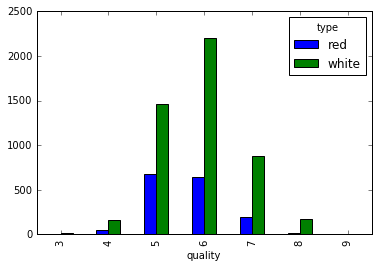

In [21]:
%matplotlib inline
pd.crosstab(index=data['quality'],
           columns=data['type'],margins=False).plot(kind='bar')

# Exercice 18.2 (2 points)

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


In [82]:
y = (data['quality'] > 5 ).astype(int)
y.mean()

0.6330614129598277

In [83]:
X = data.drop(['quality','type'],axis=1)

In [84]:
X_red = X[data['type']== 'red']
X_white = X[data['type']== 'white']
y_red = y[data['type']== 'red']
y_white = y[data['type']== 'white']

In [85]:
y_red.mean(),y_white.mean()

(0.5347091932457786, 0.6651694569211923)

In [86]:
X_red_estan = (X_red-(X_red.mean())) / np.std(X_red)
X_red_estan.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4898,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
4899,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
4900,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
4901,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4902,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [87]:
X_white_estan = (X_white-(X_white.mean())) / np.std(X_white)
X_white_estan.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


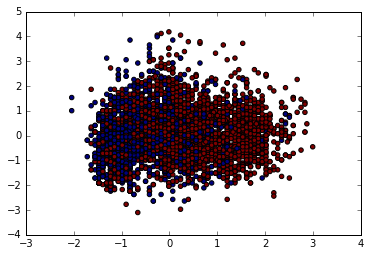

In [88]:
import matplotlib.pyplot as plt

plt.scatter(x=X_white_estan['alcohol'],
            y=X_white_estan['pH'],
            c=y_white)

In [89]:
from sklearn.decomposition import PCA

In [90]:
X_white_pca = PCA().fit_transform(X_white_estan)

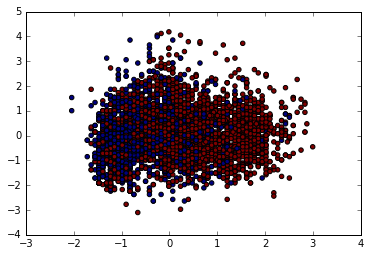

In [91]:
plt.scatter(x=X_white_estan['alcohol'],
            y=X_white_estan['pH'],
            c=y_white)

In [92]:
# train/test split
from sklearn.cross_validation import train_test_split
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red_estan, y_red, random_state=1)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white_estan, y_white, random_state=1)

In [93]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X_train_red, y_train_red)
y_pred_red = clf.predict(X_test_red)

In [94]:
from sklearn import metrics
def results(y_pred_red,y_test_red):
    f1 = metrics.f1_score(y_pred_red,y_test_red) 
    acc = metrics.accuracy_score(y_pred_red,y_test_red)
    fbeta = metrics.fbeta_score(y_pred_red,y_test_red,1)
    
    return acc,f1,fbeta

In [95]:
results(y_pred_red,y_test_red)

(0.73250000000000004, 0.73047858942065491, 0.73047858942065491)

In [96]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X_train_white, y_train_white)
y_pred_white = clf.predict(X_test_white)

In [97]:
from sklearn import metrics
def results(y_pred_white,y_test_white):
    f1 = metrics.f1_score(y_pred_white,y_test_white) 
    acc = metrics.accuracy_score(y_pred_white,y_test_white)
    fbeta = metrics.fbeta_score(y_pred_white,y_test_white,1)
    
    return acc,f1,fbeta

In [98]:
results(y_pred_white,y_test_white)

(0.7371428571428571, 0.81807909604519768, 0.81807909604519768)

# Exercice 18.3 (2 points)

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’,'linear')


In [100]:
clf = SVC(kernel='poly')
clf.fit(X_train_white, y_train_white)
y_pred_white = clf.predict(X_test_white)
results(y_pred_white,y_test_white)

(0.7355102040816327, 0.82543103448275867, 0.82543103448275867)

In [101]:
clf = SVC(kernel='poly')
clf.fit(X_train_red, y_train_red)
y_pred_red = clf.predict(X_test_red)
results(y_pred_red,y_test_red)

(0.72999999999999998, 0.73913043478260887, 0.73913043478260887)

In [102]:
clf = SVC(kernel='rbf')
clf.fit(X_train_white, y_train_white)
y_pred_white = clf.predict(X_test_white)
results(y_pred_white,y_test_white)

(0.77224489795918372, 0.83900750144258507, 0.83900750144258507)

In [103]:
clf = SVC(kernel='rbf')
clf.fit(X_train_red, y_train_red)
y_pred_red = clf.predict(X_test_red)
results(y_pred_red,y_test_red)

(0.73999999999999999, 0.74634146341463425, 0.74634146341463425)

In [104]:
clf = SVC(kernel='sigmoid')
clf.fit(X_train_white, y_train_white)
y_pred_white = clf.predict(X_test_white)
results(y_pred_white,y_test_white)

(0.66775510204081634, 0.80078316201664224, 0.80078316201664224)

In [105]:
clf = SVC(kernel='sigmoid')
clf.fit(X_train_red, y_train_red)
y_pred_red = clf.predict(X_test_red)
results(y_pred_red,y_test_red)

(0.53000000000000003, 0.69281045751633985, 0.69281045751633985)

# Exercice 18.4 (2 points)

Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

In [108]:
clf = SVC(kernel='sigmoid',C=100, gamma=0.01)
clf.fit(X_train_red, y_train_red)
y_pred_red = clf.predict(X_test_red)
results(y_pred_red,y_test_red)

(0.71750000000000003, 0.72771084337349401, 0.72771084337349401)

# Exercice 18.5

Compare the results with other methods

Elegir el mejor kernel y combinacion y comparar con otros metodos.